# Using Interact

* https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [20]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [21]:
def f(x):
    return x

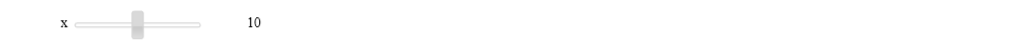

10

In [22]:
interact(f, x=10);

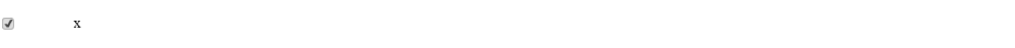

True

In [23]:
interact(f, x=True);

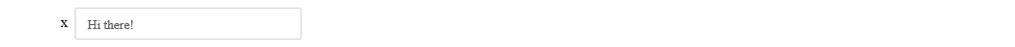

'Hi there!'

In [24]:
interact(f, x='Hi there!');

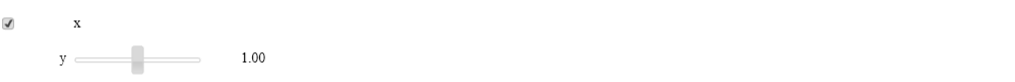

(True, 1.0)

In [25]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

In [26]:
def h(p, q):
    return (p, q)

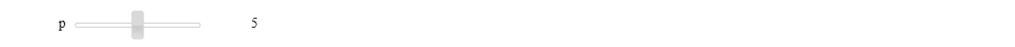

(5, 20)

In [27]:
interact(h, p=5, q=fixed(20));

In [28]:
widgets.IntSlider(min=-10,max=30,step=1,value=10);

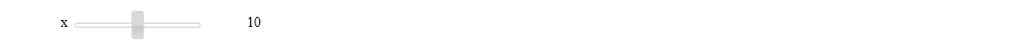

10

In [29]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

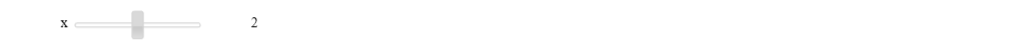

2

In [30]:
interact(f, x=(0,4));

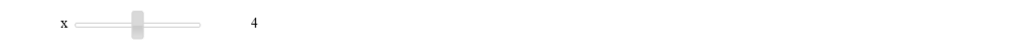

4

In [31]:
interact(f, x=(0,8,2));

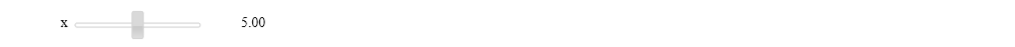

5.0

In [32]:
interact(f, x=(0.0,10.0));

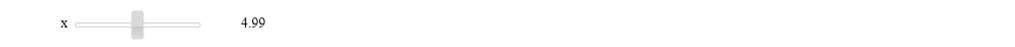

4.99

In [33]:
interact(f, x=(0.0,10.0,0.01));

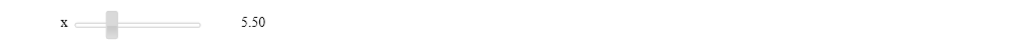

5.5

In [34]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

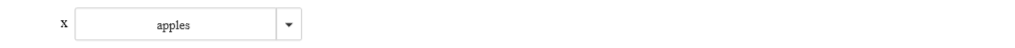

'apples'

In [35]:
interact(f, x=['apples','oranges']);

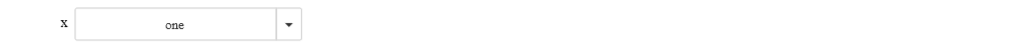

10

In [36]:
interact(f, x={'one': 10, 'two': 20});

# Does not work 

# Does not work 

https://docs.python.org/3/tutorial/controlflow.html#function-annotations

In [37]:
def anno_func(ham: str, eggs: str = 'eggs') -> str:
    print("Annotations:", anno_func.__annotations__)
    print("Arguments:", ham, eggs)
    return ham + ' and ' + eggs

In [38]:
anno_func('lulu')

Annotations: {'return': <class 'str'>, 'ham': <class 'str'>, 'eggs': <class 'str'>}
Arguments: lulu eggs


'lulu and eggs'

In [39]:
anno_func.__annotations__

{'eggs': str, 'ham': str, 'return': str}

In [40]:
from IPython.utils.py3compat import annotate

In [41]:
@annotate(x=True)
def f(x):
    return x

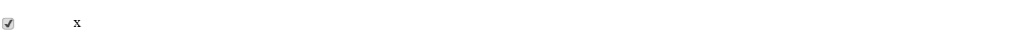

True

In [42]:
interact(f);

In [43]:
def f(a, b):
    return a+b

In [44]:
w = interactive(f, a=10, b=20)

In [45]:
type(w)

ipywidgets.widgets.widget_box.Box

In [46]:
w.children

(<ipywidgets.widgets.widget_int.IntSlider at 0x38407e5710>,
 <ipywidgets.widgets.widget_int.IntSlider at 0x38407fff98>)

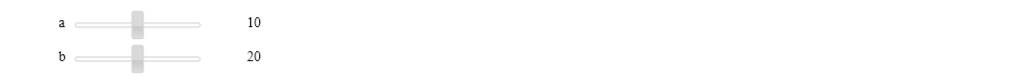

30

In [47]:
from IPython.display import display
display(w)

In [48]:
w.kwargs

{'a': 10, 'b': 20}

In [49]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return

In [50]:
%%time
slow_function(1e6)

1000000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002]
Wall time: 2.68 s


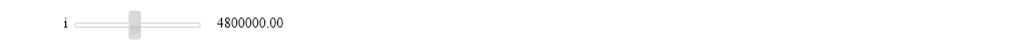

4800000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [51]:
from ipywidgets import FloatSlider

interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5))

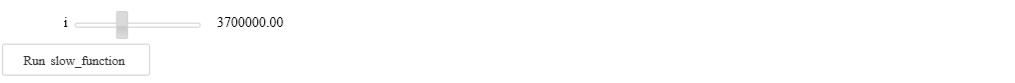

3700000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [52]:
# %%writefile -a test.py
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5),__manual=True)

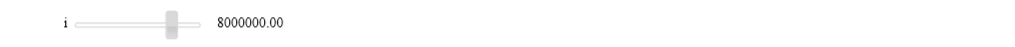

8000000 [0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002, 1000001, 1001001, 1002001, 1010101, 1011101, 1012101, 1100011, 1101011, 1102011, 1110111, 1111111, 2000002, 2001002]


In [53]:
# %%writefile -a test.py
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5,continuous_update=False))

# Linking widgets using Observer pattern

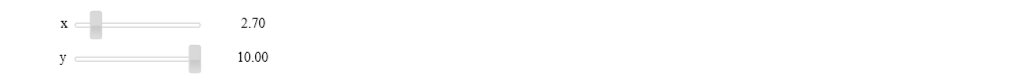

2.7 10.0


In [54]:
# %%writefile -a test.py

x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

# When y_widget's value changes, 
#     call the update_x function
#     set the x_widget's max value to be two times the y_widget's value

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value

y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget)